<a href="https://colab.research.google.com/github/saini-gk/DetectronX/blob/main/DetectronX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Now Copy the API Command
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 22.9MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


###Our dataset is in .zip format. now we will unzip it

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()

##Now we will load the libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

##Now we will use the concept of generators to load data in batches and at the  same time we customize it as well

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # cat --> 0 and dog --> 1
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # cat --> 0 and dog --> 1
    batch_size = 32, #The batch_size parameter is set to 32, which means that 32 images will be grouped together and processed as a single batch during training.
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalizing our dataset

In [6]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model1.fit(train_ds, epochs = 10, validation_data =validation_ds )

Epoch 1/10
625/625 [==============================] - 61s 87ms/step - loss: 0.6156 - accuracy: 0.6555 - val_loss: 0.5199 - val_accuracy: 0.7414
Epoch 2/10
625/625 [==============================] - 51s 80ms/step - loss: 0.4891 - accuracy: 0.7616 - val_loss: 0.4556 - val_accuracy: 0.7912
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3771 - accuracy: 0.8299 - val_loss: 0.4912 - val_accuracy: 0.7770
Epoch 4/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2416 - accuracy: 0.8975 - val_loss: 0.6554 - val_accuracy: 0.7938
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1426 - accuracy: 0.9445 - val_loss: 0.9024 - val_accuracy: 0.7880
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0987 - accuracy: 0.9623 - val_loss: 1.0001 - val_accuracy: 0.7916
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0687 - accuracy: 0.9768 - val_loss: 1.1360 - val_accuracy:

# Results are showing that our model is overfit

In [11]:
import matplotlib.pyplot as plt

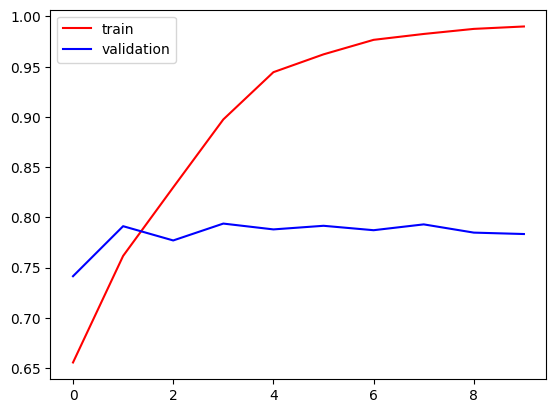

In [12]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

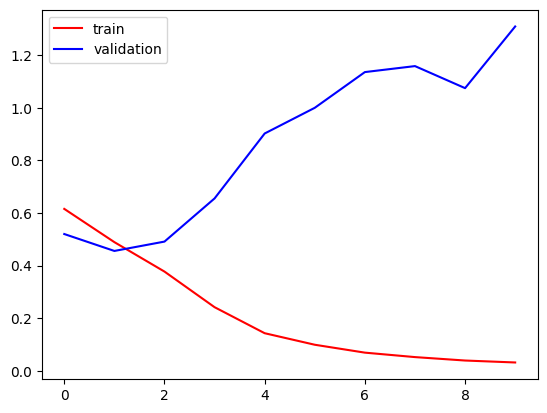

In [13]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# Now we will regularize our model

In [14]:
from keras.layers import BatchNormalization, Dropout

In [15]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),


model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'sigmoid'))

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
history = model1.fit(train_ds, epochs = 10, validation_data =validation_ds )

Epoch 1/10
625/625 [==============================] - 67s 100ms/step - loss: 1.0018 - accuracy: 0.6177 - val_loss: 0.6039 - val_accuracy: 0.6884
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5416 - accuracy: 0.7295 - val_loss: 0.5274 - val_accuracy: 0.7574
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4540 - accuracy: 0.7890 - val_loss: 0.4779 - val_accuracy: 0.7868
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4001 - accuracy: 0.8256 - val_loss: 0.4605 - val_accuracy: 0.7846
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3379 - accuracy: 0.8528 - val_loss: 0.4507 - val_accuracy: 0.7996
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2582 - accuracy: 0.8917 - val_loss: 0.5552 - val_accuracy: 0.7844
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1798 - accuracy: 0.9281 - val_loss: 0.7884 - val_ac

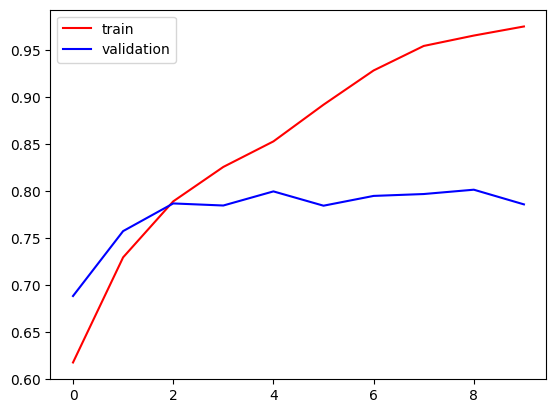

In [19]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

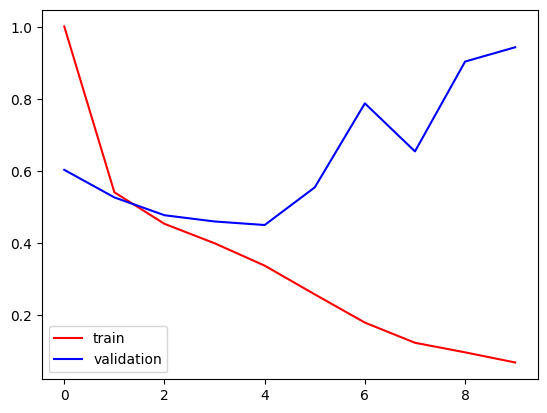

In [20]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

# Conclusion --- after normalization, somehow the model

##Object Detection

In [21]:
import cv2

In [22]:
test_img = cv2.imread("dog.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

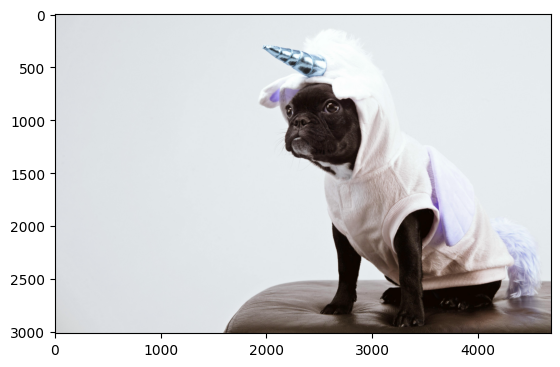

In [23]:
plt.imshow(test_img)
plt.show

In [24]:
#See shape of image
test_img.shape

(3016, 4692, 3)

In [25]:
test_img = cv2.resize(test_img, (256,256))
#Resizing: This changes the dimensions of the image, either by shrinking or enlarging it.
#In your code, cv2.resize(test_img, (256,256)) resizes test_img to have a width of 256 pixels and a height of 256 pixels.

#Reshaping: This changes the way the image data is organized, without changing the total number of pixels.
#For example, you could reshape a 256x256 image into a 65536x1 array, where each element in the array represents a single pixel value.

In [26]:
test_img.shape

(256, 256, 3)

In [27]:
test_img = test_img.reshape(1,256,256,3)
#Change the dimension using reshape function

In [28]:
test_img.shape

(1, 256, 256, 3)

In [29]:
model1.predict(test_img)

1/1 [==============================] - 0s 444ms/step


array([[1.]], dtype=float32)

##New Image Detection


In [30]:
test_img = cv2.imread("/content/dog1.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

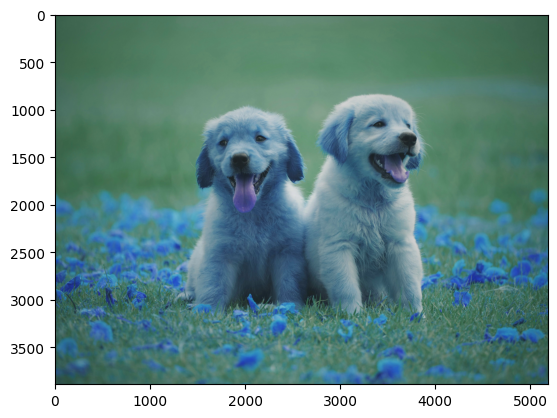

In [31]:
plt.imshow(test_img)
plt.show

In [32]:
#See shape of image
test_img.shape

(3888, 5184, 3)

In [33]:
test_img = cv2.resize(test_img, (256,256))

In [34]:
test_img = test_img.reshape(1,256,256,3)

In [35]:
model1.predict(test_img)

1/1 [==============================] - 0s 20ms/step


array([[6.587368e-24]], dtype=float32)

##New Image Detection

In [36]:
test_img = cv2.imread("/content/cat.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

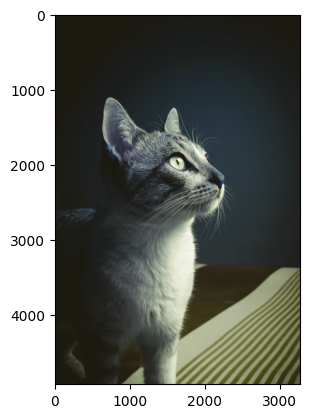

In [37]:
plt.imshow(test_img)
plt.show

In [38]:
#See shape of image
test_img.shape

(4928, 3264, 3)

In [39]:
test_img = cv2.resize(test_img, (256,256))

In [40]:
test_img = test_img.reshape(1,256,256,3)

In [41]:
model1.predict(test_img)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

##New Image Detection


In [42]:
test_img = cv2.imread("/content/cat1.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

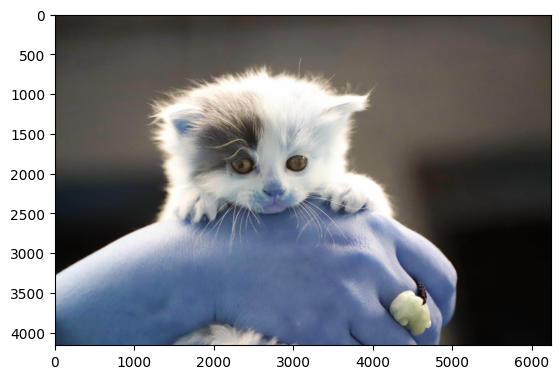

In [43]:
plt.imshow(test_img)
plt.show

In [44]:
#See shape of image
test_img.shape

(4160, 6240, 3)

In [45]:
test_img = cv2.resize(test_img, (256,256))

In [46]:
test_img = test_img.reshape(1,256,256,3)

In [47]:
model1.predict(test_img)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)